In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
import seaborn as sns


In [159]:
#importing training data and test data
train=pd.read_csv('ttrain.csv')
test=pd.read_csv('ttest.csv')
#shows top 5 tuples
train.head()
#dimension of dataset
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [160]:
#cleaning of data
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [161]:
print(test)

     PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jon

In [162]:
#finding number of missing data in each column/attribute
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [163]:

#filling missing data with mean value of that particular feature
from sklearn.preprocessing import Imputer
Imp=Imputer(missing_values='NaN',strategy='mean',axis=1)
newage1=Imp.fit_transform(train.Age.values.reshape(1,-1))
Imp=Imputer(missing_values='NaN',strategy='mean',axis=1)
newage2=Imp.fit_transform(test.Age.values.reshape(1,-1))



C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [164]:
#finding transpose of new age so that it can be appended to original training set
#i have added age2 attribute to training set ,it donot have any missing data now
train['Age']=newage1.T


#handling embarked missing data by filling with most occuring category
train.Embarked.value_counts()
train.Embarked.fillna('S',inplace=True)

#for cabin more than 50% data is missing so i have dropped this feature
train.drop('Cabin',axis=1,inplace=True)
train.isnull().sum()





PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [165]:
#handling test data

test.isnull().sum()





PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [166]:
Imp=Imputer(missing_values='NaN',strategy='mean',axis=1)
newage=Imp.fit_transform(test.Age.values.reshape(1,-1))
test['Age']=newage.T
test.drop('Cabin',axis=1,inplace=True)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [167]:
 test['Age1']=test['Age']
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Age1           0
dtype: int64

In [168]:
test.Fare.fillna(test.Fare.mean(),inplace =True)

In [169]:
test.drop('Age',axis=1,inplace=True)
#missing data handeled

In [170]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age1           0
dtype: int64

In [171]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [172]:
train = pd.get_dummies(train, columns=["Sex"], drop_first=True)
train = pd.get_dummies(train, columns=["Embarked"],drop_first=True)
test = pd.get_dummies(test, columns=["Sex"], drop_first=True)
test = pd.get_dummies(test, columns=["Embarked"],drop_first=True)

In [173]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [174]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
SibSp          0
Parch          0
Ticket         0
Fare           0
Age1           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [175]:
#setting passengerId as index of training set
train.set_index('PassengerId',inplace=True)
test.set_index('PassengerId',inplace=True)



In [176]:
train


,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,0,0
3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,0,1
5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1,0,1
6,0,3,"Moran, Mr. James",29.699118,0,0,330877,8.4583,1,1,0
7,0,1,"McCarthy, Mr. Timothy J",54.000000,0,0,17463,51.8625,1,0,1
8,0,3,"Palsson, Master. Gosta Leonard",2.000000,3,1,349909,21.0750,1,0,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,347742,11.1333,0,0,1


In [177]:
#explanatory 
train.groupby('Sex_male').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Sex_male,,,,,,,,
0,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818,0.114650,0.652866
1,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893,0.071057,0.764298


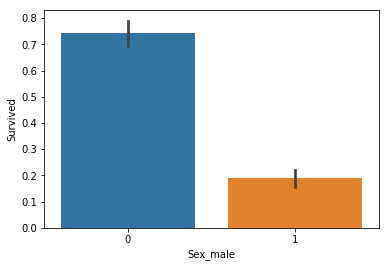

In [178]:
sns.barplot(x='Sex_male',y='Survived',data=train)

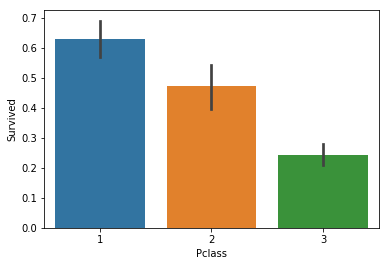

In [179]:
sns.barplot(x='Pclass',y='Survived',data=train)

In [180]:
train


,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,0,0
3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,0,1
5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1,0,1
6,0,3,"Moran, Mr. James",29.699118,0,0,330877,8.4583,1,1,0
7,0,1,"McCarthy, Mr. Timothy J",54.000000,0,0,17463,51.8625,1,0,1
8,0,3,"Palsson, Master. Gosta Leonard",2.000000,3,1,349909,21.0750,1,0,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,347742,11.1333,0,0,1


In [181]:
#Feature Engineering to add extra features to the dataset
#i added family which is sum of sibling and parants and self
train['family_size']=train['SibSp']+train['Parch']+1
test['family_size']=test['SibSp']+test['Parch']+1

In [182]:
print(train['family_size'])
print(test['family_size'])


PassengerId
1       2
2       2
3       1
4       2
5       1
6       1
7       1
8       5
9       3
10      2
11      3
12      1
13      1
14      7
15      1
16      1
17      6
18      1
19      2
20      1
21      1
22      1
23      1
24      1
25      5
26      7
27      1
28      6
29      1
30      1
       ..
862     2
863     1
864    11
865     1
866     1
867     2
868     1
869     1
870     3
871     1
872     3
873     1
874     1
875     2
876     1
877     1
878     1
879     1
880     2
881     2
882     1
883     1
884     1
885     1
886     6
887     1
888     1
889     4
890     1
891     1
Name: family_size, Length: 891, dtype: int64
PassengerId
892     1
893     2
894     1
895     1
896     3
897     1
898     1
899     3
900     1
901     3
902     1
903     1
904     2
905     2
906     2
907     2
908     1
909     1
910     2
911     1
912     2
913     2
914     1
915     2
916     5
917     2
918     2
919     1
920     1
921     3
       ..
1280    1
1

In [183]:
#adding new feture as type of family based on size of family
def family_group(size):
    a=''
    if (size <= 1):
        a='alone'
    elif (size <=4):
        a='small'
    else:
        a='large'
        
    return a
        
        
train['family_group']=train.family_size.map(family_group)





def family_group(size):
    a=''
    if (size <= 1):
        a='alone'
    elif (size <=4):
        a='small'
    else:
        a='large'
        
    return a
        
        
test['family_group']=test.family_size.map(family_group)
        
     

In [184]:
train


,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,family_size,family_group
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1,0,1,2,small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,0,0,2,small
3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1,1,alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,0,1,2,small
5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1,0,1,1,alone
6,0,3,"Moran, Mr. James",29.699118,0,0,330877,8.4583,1,1,0,1,alone
7,0,1,"McCarthy, Mr. Timothy J",54.000000,0,0,17463,51.8625,1,0,1,1,alone
8,0,3,"Palsson, Master. Gosta Leonard",2.000000,3,1,349909,21.0750,1,0,1,5,large
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,347742,11.1333,0,0,1,3,small


In [185]:
#adding new feature age group
def age_group(age):
    a=''
    if(age<=1):
        a='infant'
    elif(age<=4):
        a='toddler'
    elif(age<=12):
        a='young'
    elif(age<=19):
        a='teenager'
    elif(age<=30):
        a='young adult'
    elif(age<=45):
        a='adult'
    elif(age<=65):
        a='miidle age'
    else:
        a='old'
    return a;
train['age_group']=train.Age.map(age_group)

def age_group(age):
    a=''
    if(age<=1):
        a='infant'
    elif(age<=4):
        a='toddler'
    elif(age<=12):
        a='young'
    elif(age<=19):
        a='teenager'
    elif(age<=30):
        a='young adult'
    elif(age<=45):
        a='adult'
    elif(age<=65):
        a='miidle age'
    else:
        a='old'
    return a;
test['age_group']=test.Age1.map(age_group)
    
        
        

In [186]:
train

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,family_size,family_group,age_group
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1,0,1,2,small,young adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,0,0,2,small,adult
3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1,1,alone,young adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,0,1,2,small,adult
5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1,0,1,1,alone,adult
6,0,3,"Moran, Mr. James",29.699118,0,0,330877,8.4583,1,1,0,1,alone,young adult
7,0,1,"McCarthy, Mr. Timothy J",54.000000,0,0,17463,51.8625,1,0,1,1,alone,miidle age
8,0,3,"Palsson, Master. Gosta Leonard",2.000000,3,1,349909,21.0750,1,0,1,5,large,toddler
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,347742,11.1333,0,0,1,3,small,young adult


In [187]:
#creating dummy variables for categorical data
train=pd.get_dummies(train,columns=['family_group','age_group'],drop_first=True)
train.drop(['family_size'],axis=1,inplace=True)



test=pd.get_dummies(test,columns=['family_group','age_group'],drop_first=True)
test.drop(['family_size'],axis=1,inplace=True)
test.head()


,Pclass,Name,SibSp,Parch,Ticket,Fare,Age1,Sex_male,Embarked_Q,Embarked_S,family_group_large,family_group_small,age_group_infant,age_group_miidle age,age_group_old,age_group_teenager,age_group_toddler,age_group_young,age_group_young adult
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",0,0,330911,7.8292,34.5,1,1,0,0,0,0,0,0,0,0,0,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,0,363272,7.0000,47.0,0,0,1,0,1,0,1,0,0,0,0,0
894,2,"Myles, Mr. Thomas Francis",0,0,240276,9.6875,62.0,1,1,0,0,0,0,1,0,0,0,0,0
895,3,"Wirz, Mr. Albert",0,0,315154,8.6625,27.0,1,0,1,0,0,0,0,0,0,0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,3101298,12.2875,22.0,0,0,1,0,1,0,0,0,0,0,0,1


In [191]:
train.shape
train.isnull().sum()
train

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,family_group_large,family_group_small,age_group_infant,age_group_miidle age,age_group_old,age_group_teenager,age_group_toddler,age_group_young,age_group_young adult
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1,0,1,0,1,0,0,0,0,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,0,0,0,1,0,0,0,0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,0,0,0,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,0,1,0,1,0,0,0,0,0,0,0
5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1,0,1,0,0,0,0,0,0,0,0,0
6,0,3,"Moran, Mr. James",29.699118,0,0,330877,8.4583,1,1,0,0,0,0,0,0,0,0,0,1
7,0,1,"McCarthy, Mr. Timothy J",54.000000,0,0,17463,51.8625,1,0,1,0,0,0,1,0,0,0,0,0
8,0,3,"Palsson, Master. Gosta Leonard",2.000000,3,1,349909,21.0750,1,0,1,1,0,0,0,0,0,1,0,0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,347742,11.1333,0,0,1,0,1,0,0,0,0,0,0,1


In [192]:
#now dropping some features which has no use because we have created different features from these feature
train.drop(['Name','Age','Ticket'],axis=1,inplace=True)
test.drop(['Name','Age1','Ticket'],axis=1,inplace=True)

In [194]:
test.head()

,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,family_group_large,family_group_small,age_group_infant,age_group_miidle age,age_group_old,age_group_teenager,age_group_toddler,age_group_young,age_group_young adult
PassengerId,,,,,,,,,,,,,,,,
892,3,0,0,7.8292,1,1,0,0,0,0,0,0,0,0,0,0
893,3,1,0,7.0000,0,0,1,0,1,0,1,0,0,0,0,0
894,2,0,0,9.6875,1,1,0,0,0,0,1,0,0,0,0,0
895,3,0,0,8.6625,1,0,1,0,0,0,0,0,0,0,0,1
896,3,1,1,12.2875,0,0,1,0,1,0,0,0,0,0,0,1


In [195]:
train.shape

(891, 17)

In [196]:
X=train.drop('Survived',axis=1)
Y=train['Survived'].astype(int)

In [197]:
X

,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,family_group_large,family_group_small,age_group_infant,age_group_miidle age,age_group_old,age_group_teenager,age_group_toddler,age_group_young,age_group_young adult
PassengerId,,,,,,,,,,,,,,,,
1,3,1,0,7.2500,1,0,1,0,1,0,0,0,0,0,0,1
2,1,1,0,71.2833,0,0,0,0,1,0,0,0,0,0,0,0
3,3,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1
4,1,1,0,53.1000,0,0,1,0,1,0,0,0,0,0,0,0
5,3,0,0,8.0500,1,0,1,0,0,0,0,0,0,0,0,0
6,3,0,0,8.4583,1,1,0,0,0,0,0,0,0,0,0,1
7,1,0,0,51.8625,1,0,1,0,0,0,1,0,0,0,0,0
8,3,3,1,21.0750,1,0,1,1,0,0,0,0,0,1,0,0
9,3,0,2,11.1333,0,0,1,0,1,0,0,0,0,0,0,1


In [198]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     1
13     0
14     0
15     0
16     1
17     0
18     1
19     0
20     1
21     0
22     1
23     1
24     1
25     0
26     1
27     0
28     0
29     1
30     0
      ..
862    0
863    1
864    0
865    0
866    1
867    1
868    0
869    0
870    1
871    0
872    1
873    0
874    0
875    1
876    1
877    0
878    0
879    0
880    1
881    1
882    0
883    0
884    0
885    0
886    0
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int32

In [203]:
print(test.shape)
print(X.shape)
print(Y.shape)

(418, 16)
(891, 16)
(891,)


In [206]:
from sklearn.svm import SVC
classifier=SVC()
xtrain=X
ytrain=Y
ytrain=ytrain.values.ravel()
classifier.fit(xtrain,ytrain)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [207]:
Result=classifier.predict(test)
print(Result)
print(len(Result))

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1
 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]
418


In [208]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
xtrain=X
ytrain=Y
ytrain=ytrain.values.ravel()
classifier.fit(xtrain,ytrain)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [209]:
Result=classifier.predict(test)
print(Result)
print(len(Result))

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]
418
